In [7]:
import uproot
import awkward as ak
import numpy as np
import math
import hist
import matplotlib.pyplot as plt
import os
import subprocess
import vector

In [8]:
vector.register_awkward() 

In [9]:
DATATYPE="data"
assert((DATATYPE=="mc") or (DATATYPE=="data"))
BASEDIR="." # basedir where to look for runXXX.DATATYPE.root files
IS_MC=True if DATATYPE=="mc" else False

In [10]:
!curl 'https://cernbox.cern.ch/remote.php/dav/public-files/JIjQaAYEQnmRDkX/291694/AnalysisResults.root' > run291694.data.root

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  100M  100  100M    0     0   132k      0  0:12:53  0:12:53 --:--:-- 1450k  0  0:21:06  0:00:18  0:20:48  104k 108k      0  0:15:50  0:00:59  0:14:51  110k3k      0  0:15:05  0:01:28  0:13:37  127k0   120k      0  0:14:12  0:06:42  0:07:30 92578   120k      0  0:14:15  0:07:02  0:07:13  114k  0     0   116k      0  0:14:44  0:09:21  0:05:23  112k   116k      0  0:14:44  0:09:22  0:05:22  111k     0   116k      0  0:14:44  0:09:33  0:05:11  103k    0  0:15:02  0:10:53  0:04:09 56166


In [1]:
!file *.root
file = uproot.open("run291694.data.root")
file.keys()
events = file["eventsTree"]
events.show()

run290223.data.root: ROOT file Version 62406 (Compression: 1)
run291694.data.root: ROOT file Version 61600 (Compression: 1)
run291694.mc.root:   ROOT file Version 61600 (Compression: 1)


NameError: name 'uproot' is not defined

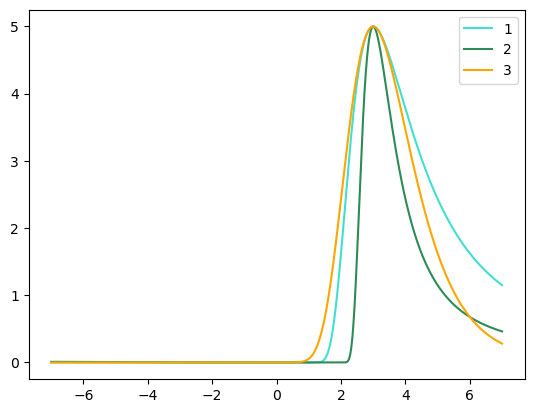

In [2]:
import uproot
import awkward as ak
import numpy as np
import math
import hist
import matplotlib.pyplot as plt
import os
import subprocess
import vector

vector.register_awkward() 

DATATYPE="mc"
assert((DATATYPE=="mc") or (DATATYPE=="data"))
BASEDIR="." # basedir where to look for runXXX.DATATYPE.root files
IS_MC=True if DATATYPE=="mc" else False

def NoiseVWG(x, mu, alpha, beta, N):
    sigma = alpha + beta*((x-mu)/mu)
    y = N * np.exp(-((x-mu)**2)/(2*sigma**2))
    return y

def NoisePR(x, a1, b1, b2, N):
    y = N*(1 + a1*x)/(b1*x + b2*x)
    return y
        
def NoiseDE(x, alpha, beta1, beta2, N):
    y = N*(np.exp(beta1*x) + alpha*np.exp(beta2*x))
    return y
    
xarray = np.linspace(-7., 7., 10000)
yarray = np.array([], dtype=float)

yarray = NoiseVWG(xarray, 3., 1., 1., 5.)
yarray2 = NoiseVWG(xarray, 3., 0.5, 1., 5.)
yarray3 = NoiseVWG(xarray, 3., 1., 0.5, 5.)

plt.plot(xarray, yarray, color="turquoise", label="1")
plt.plot(xarray, yarray2, color="seagreen", label="2")
plt.plot(xarray, yarray3, color="orange", label="3")
plt.legend()
plt.show()

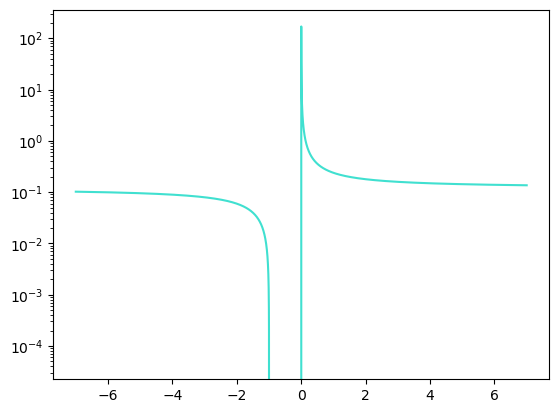

In [10]:

yarray = NoisePR(xarray, 1., 15., 27., 5.)

plt.semilogy(xarray, yarray, color="turquoise", label="1")
plt.show()

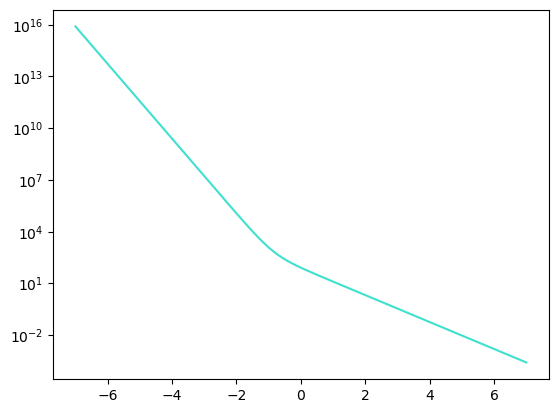

In [4]:
yarray = NoiseDE(xarray, 15., -5., -1.8, 5.)

plt.semilogy(xarray, yarray, color="turquoise", label="1")
plt.show()